<a href="https://colab.research.google.com/github/Garciashk/proyecto_caso_de_negocio/blob/main/Notebook/Churn_clasifiacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <td>
    <a target="_blank" href="https://github.com/Garciashk/proyecto_caso_de_negocio"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
  
</table>


# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Métodos de Analítica II.</strong></h1> 
<h2> Para: Juan Coba Puerto.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Andrea López Gualtero.</br></h2>
<h2>Juan Sebastián Quiroga Bernal.</br></h2>
<h2>Leonardo H. García Díaz</h2>

**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.

<img style="display: block;-webkit-user-select: none;margin: auto;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://www.tractionwise.com/wp-content/uploads/2021/01/Articles-Churn-Rate_Eng.png">

<h1> <strong> Proyecto Caso de Negocio:</strong>Predicción de churn en un Banco</h1> </br> </br> <h2>Durante el último trimestre, una institución financiera experimentó una disminución del 15% en su base de clientes activos, tras descubrir que muchos de ellos estaban migrando a otras entidades financieras a través de información externa de Datacrédito. En respuesta a esta situación, la institución decidió implementar un programa de beneficios que incluye la eliminación de cuotas de manejo, mejores tasas de interés en productos de crédito de consumo y retiros ilimitados en cajeros automáticos. Para maximizar el impacto de estos beneficios, el equipo de Análisis de Clientes necesita identificar a los clientes con mayor probabilidad de retirarse del banco y priorizar sus ofertas. El objetivo final del equipo es construir un modelo predictivo que ayude a predecir qué clientes pueden abandonar el banco y tomar medidas preventivas para retenerlos.</h2></br></br>
<h2><ol>clientnum : Identificador único del cliente.</ol>
<ol>attrition_flag : (Variable Objetivo) Indica si el cliente se fue a otro banco o no.</ol>
<ol>customer_age : Edad del cliente.</ol>
<ol>gender : Sexo del cliente.</ol>
<ol>dependent_count : Número de personas económicamente dependientes del cliente.</ol>
<ol>education_level : Nivel de Educación del Cliente.</ol>
<ol>marital_status : Estado Civil del Cliente.</ol>
<ol>income_category : Categoría de Ingresos del Cliente.</ol>
<ol>card_category : Categoría de tarjeta del cliente.</ol>
<ol>months_on_book : Antigüedad del cliente.</ol>
<ol>total_relationship_count : Total de productos que tiene el cliente con el banco.</ol>
<ol>months_inactive_12_mon : Número de meses en que el cliente estuvo inactivo en el último año.</ol>
<ol>contacts_count_12_mon : Número de contactos con el cliente en el último año.</ol>
<ol>credit_limit : Cupo de crédito del cliente.</ol>
<ol>total_revolving_bal : Balance de crédito rotativo del cliente.</ol>
<ol>avg_open_to_buy : Promedio de cupo disponible en tarjetas de crédito</ol>
<ol>total_amt_chng_q4_q1 : Cambio en el valor total de transacciones entre Q4 y Q1.</ol>
<ol>total_trans_amt : Valor total de transacciones</ol>
<ol>total_trans_ct : Cantidad de transacciones.</ol>
<ol>total_ct_chng_q4_q1 : Cambio en la cantidad total de transacciones entre Q4 y Q1.</ol>
<ol>avg_utilization_ratio : Razón de utilización de la tarjeta.</ol></h2>

<h2>La variable que se busca predecir en el presente notebook es attrition_flag, la cual determina si un cliente se cambio de banco o no. (Binaria).</h2>

El dataframe cuenta con un total de 21 variables (columnas) distintas, al validar si la variable objetivo attrition_flag, se identifica que esta desbalanceado, por lo que al momento de modelar se debe tener presente este aspecto.

# 1. Importar librerias y base de datos.

Se importarán las librerias necesarias para poder usar en el notebook.

In [59]:
# importar librerias a ser usadas.
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
#Cargar base de datos que fue previamente cargada en Google Drive. 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

bank_churn = '1OZZSqMYtniRlgENtq3lT3DOJQrzcw50Q' 


download = drive.CreateFile({'id': bank_churn}) 
download.GetContentFile('bank_churn.csv')

df = pd.read_csv(r'bank_churn.csv',sep=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

clientnum     attrition_flag  customer_age gender  dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  education_level marital_status income_category card_category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   months_on_book  ...  months_inactive_12_mon  contacts_count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [61]:
#validación de distribución de la variable de respuesta.
df.attrition_flag.value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: attrition_flag, dtype: float64

# 2. Exploración de datos.

Con el fin de poder identificar relacion entre las 19 variables independientes y la variable de respuesta, con el fin de captar algun patrón que sea preponderante para la separación entre clientes que migrarón a otro banco y los que no.



In [62]:
#Se evidencia que no hay nulos

N, M = df.shape
print("Cantidad de clientes unicos: {}\nNumero de variables: {}".format(N, M))
print('--------------------------------')
print('Cantidad de valores faltantes por variable')
df.isna().sum() 

Cantidad de clientes unicos: 10127
Numero de variables: 21
--------------------------------
Cantidad de valores faltantes por variable


clientnum                   0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


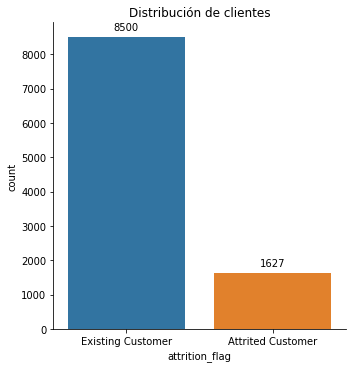

In [63]:
import seaborn as sns

# create the catplot
catplot = sns.catplot('attrition_flag', data=df, kind="count")

# set the title
catplot.set(title='Distribución de clientes')

# annotate the count values on top of the bars
for ax in catplot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# show the plot
catplot.fig.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


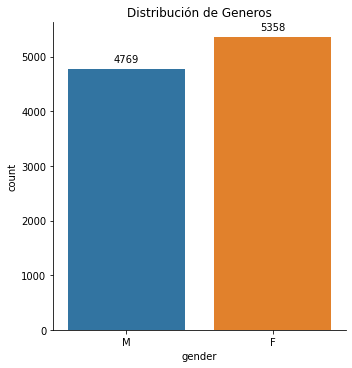

In [64]:
import seaborn as sns

# create the catplot
catplot = sns.catplot('gender', data=df, kind="count")

# set the title
catplot.set(title='Distribución de Generos')

# annotate the count values on top of the bars
for ax in catplot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# show the plot
catplot.fig.show()

In [82]:
df['education_level'].value_counts(normalize=True)*100

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: education_level, dtype: float64

In [83]:
df['education_level']= np.where(df['education_level'] == 'Doctorate', 'Post-Graduate', df['education_level'])
df['education_level'].value_counts(normalize=True)*100

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     9.548731
Name: education_level_2, dtype: float64

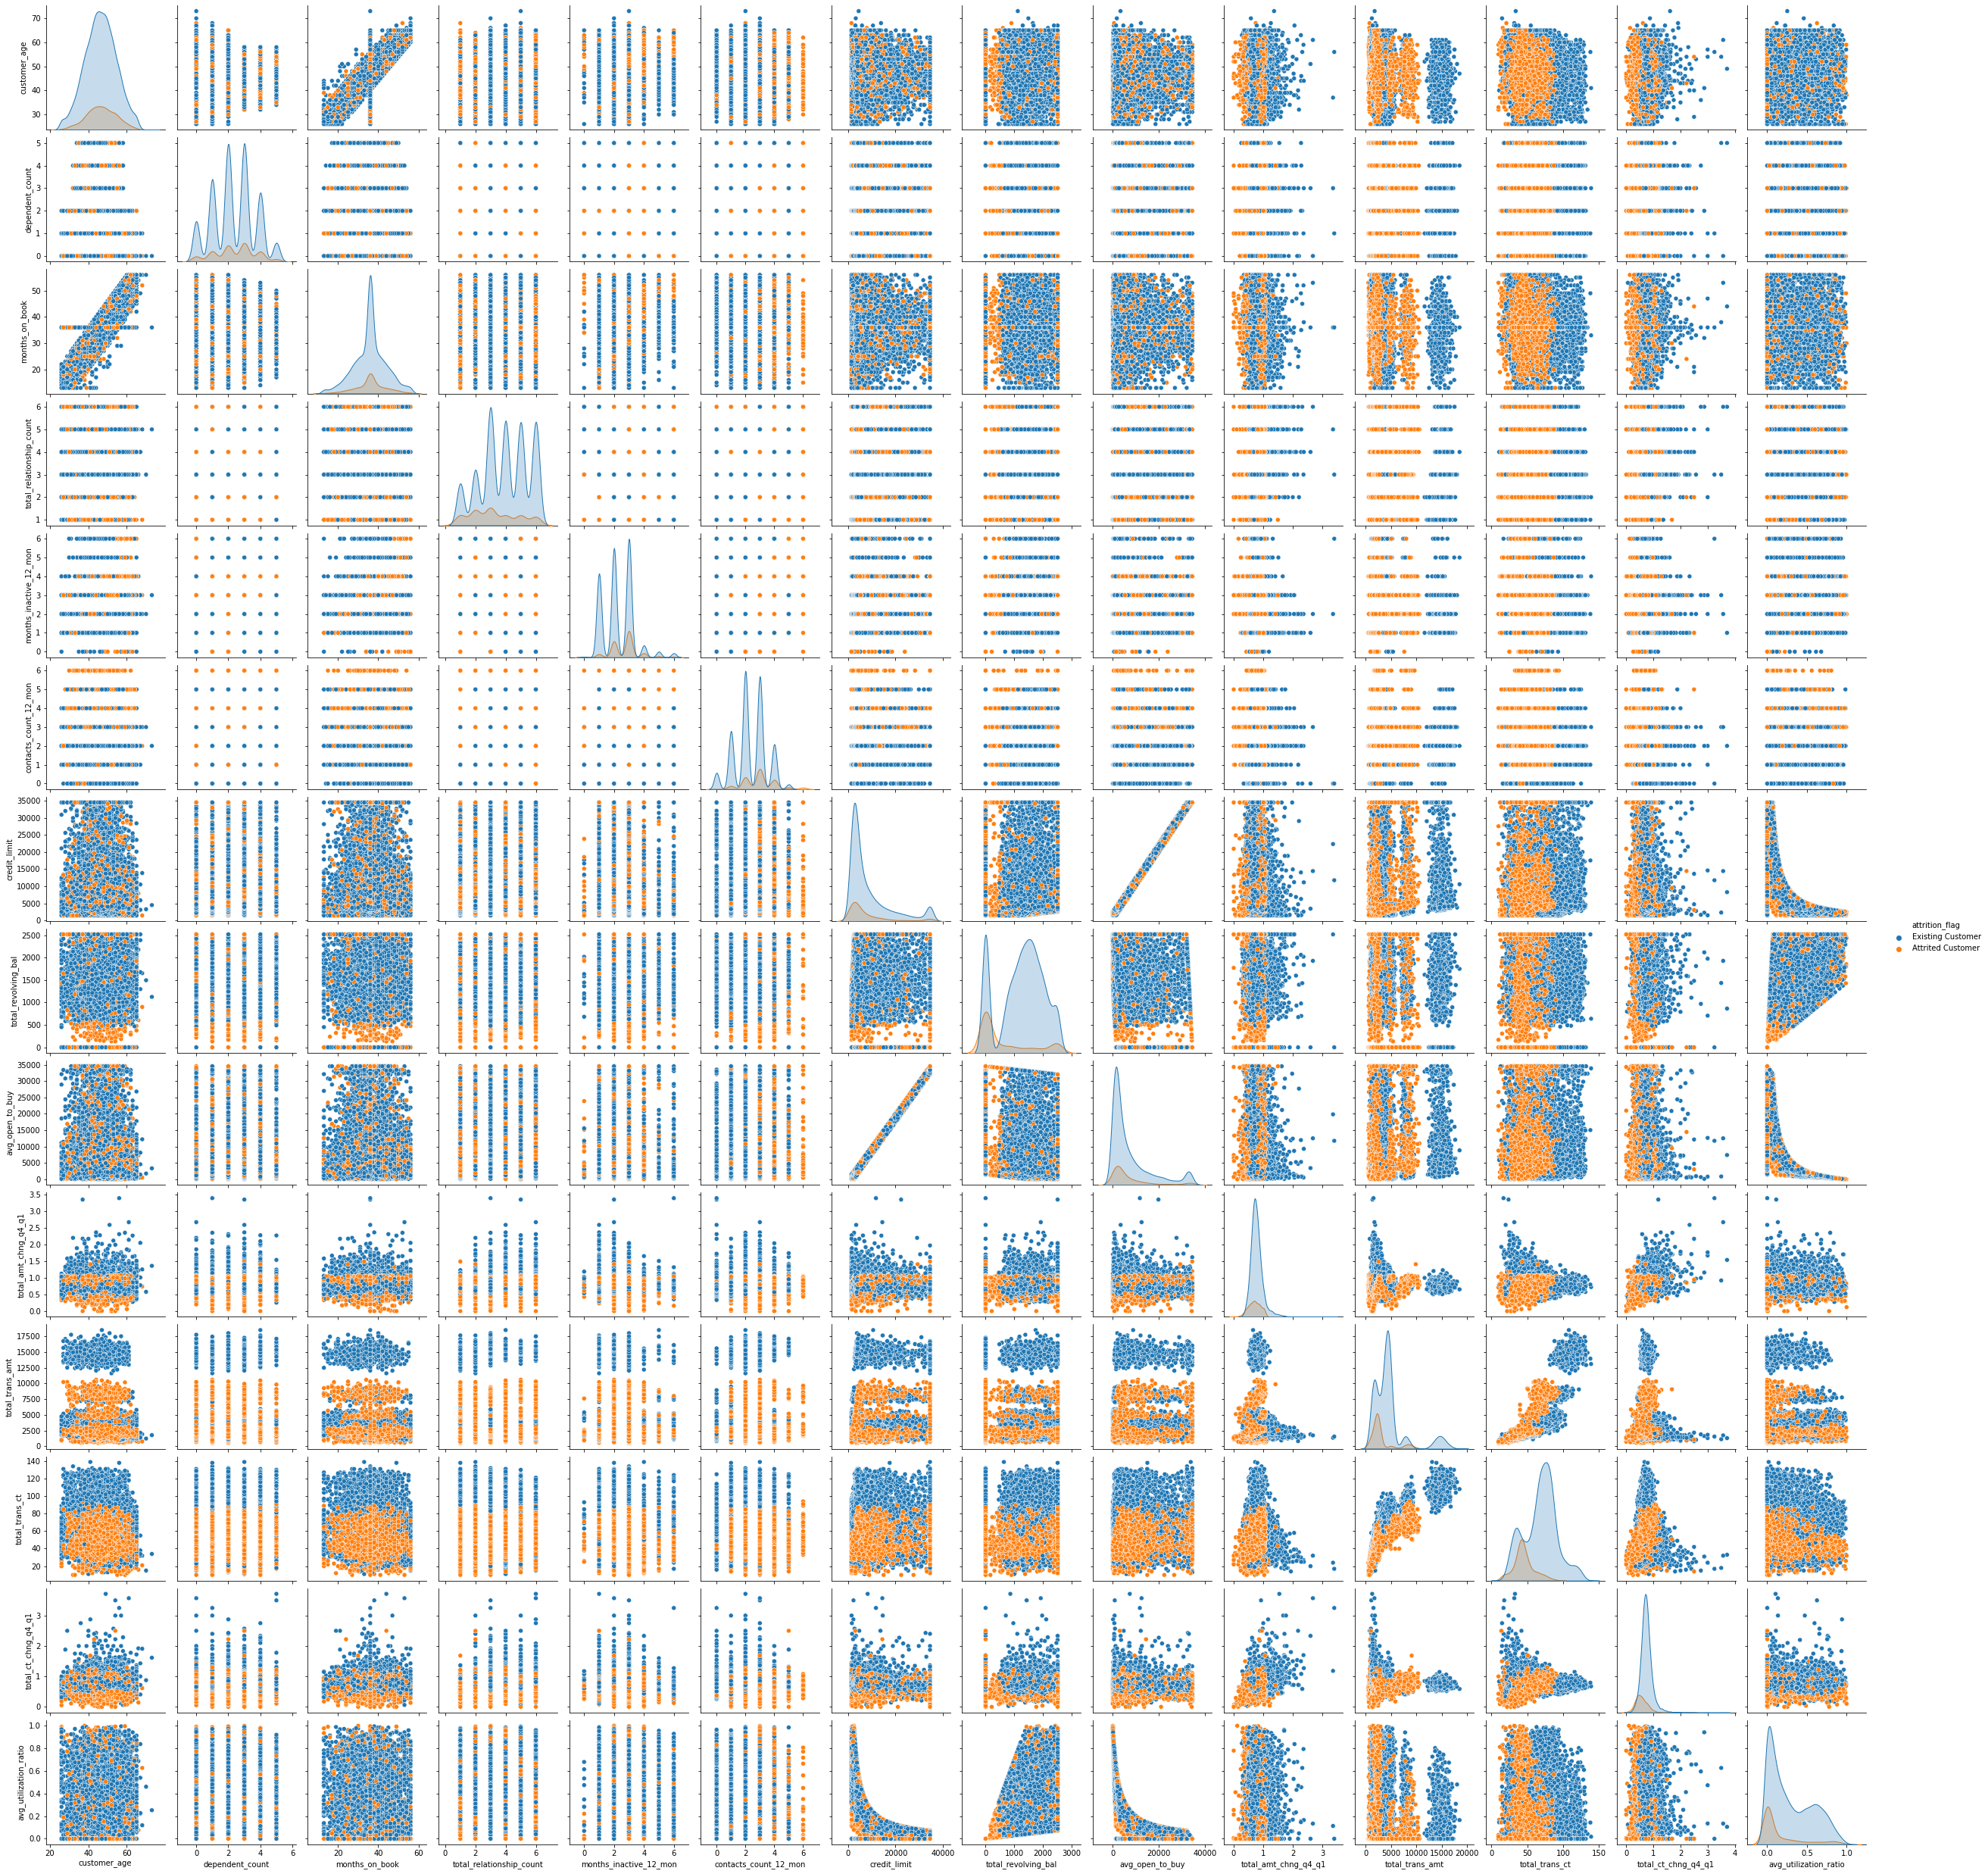

In [84]:
sns.pairplot(data=df, hue ='attrition_flag')

In [67]:
df.marital_status.unique()
df.groupby('marital_status').size()

marital_status
Divorced     748
Married     4687
Single      3943
Unknown      749
dtype: int64

In [68]:
df.income_category.unique()
df.groupby('income_category').size()

income_category
$120K +            727
$40K - $60K       1790
$60K - $80K       1402
$80K - $120K      1535
Less than $40K    3561
Unknown           1112
dtype: int64

In [69]:
df.card_category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [70]:
#Se convierten a factor
df.attrition_flag.astype('category')
df.gender.astype('category')
df.education_level.astype('category')
df.marital_status.astype('category')
df.income_category.astype('category')
df.card_category.astype('category')

0          Blue
1          Blue
2          Blue
3          Blue
4          Blue
          ...  
10122      Blue
10123      Blue
10124      Blue
10125      Blue
10126    Silver
Name: card_category, Length: 10127, dtype: category
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']

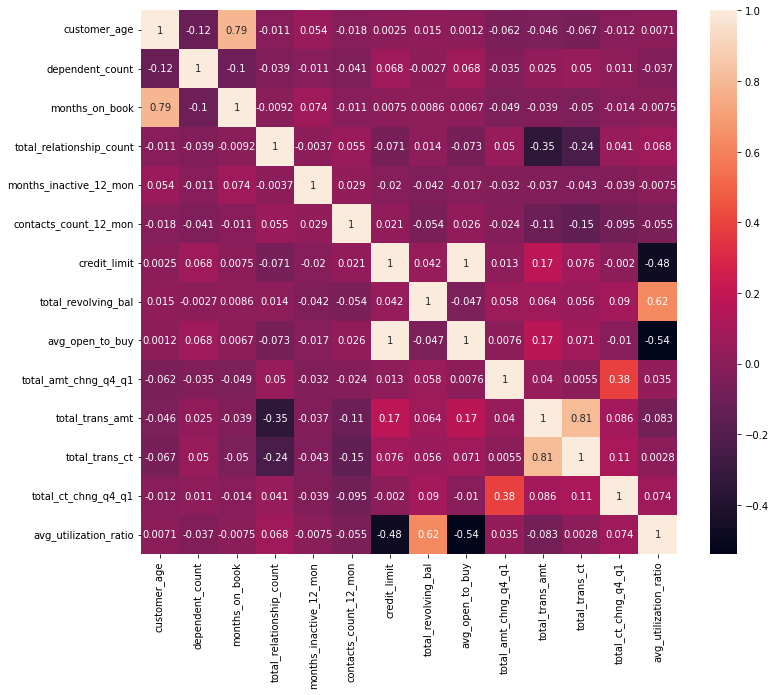

In [71]:
#Matriz de correlaciones
df.drop(['clientnum'], axis=1,inplace = True)
corr_df=df.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True)
plt.show()


In [72]:
df

attrition_flag  customer_age gender  dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      education_level marital_status income_category card_category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       months_on_book  total_relationship_count  months_inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       contacts_count_12_mon  credit_limit  total_revolving_bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       avg_open_to_buy  total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

In [73]:
df_1 = df.copy()

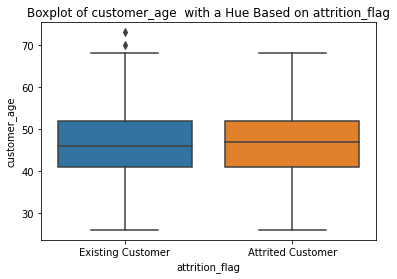

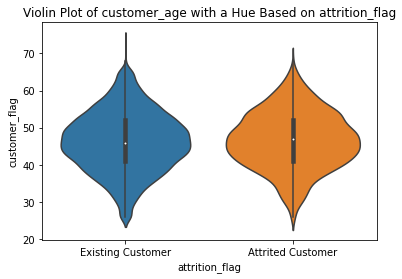

In [74]:
#Outliers
sns.boxplot(data=df_1, x='attrition_flag', y='customer_age')
#Add a title and y-axis label
plt.title('Boxplot of customer_age  with a Hue Based on attrition_flag')
plt.ylabel('customer_age')
# Show the plot
plt.show()

# Create a violin plot of Tuition with a hue based on Is.Non.Annual.
sns.violinplot(data=df_1, x='attrition_flag', y='customer_age')
# Add a title and y-axis label
plt.title('Violin Plot of customer_age with a Hue Based on attrition_flag')
plt.ylabel('customer_flag')
# Show the plot
plt.show()

<AxesSubplot:xlabel='attrition_flag', ylabel='credit_limit'>

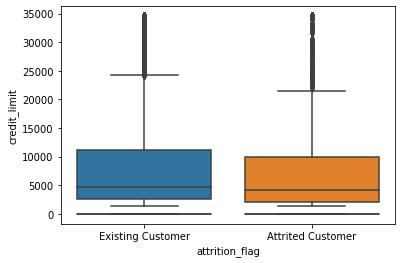

In [75]:

sns.boxplot(data=df_1, x='attrition_flag', y='total_relationship_count')
sns.boxplot(data=df_1, x='attrition_flag', y='credit_limit')

<AxesSubplot:xlabel='attrition_flag', ylabel='total_trans_ct'>

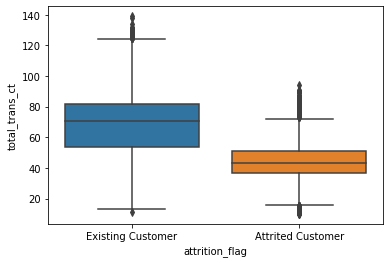

In [76]:
sns.boxplot(data=df_1, x='attrition_flag', y='total_trans_ct')

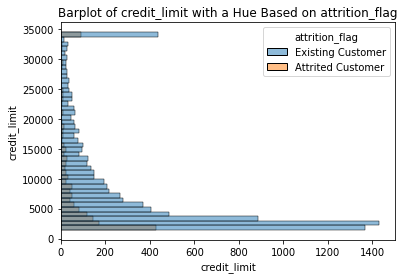

In [77]:
# Create the histogram
sns.histplot(data=df, y='credit_limit', hue='attrition_flag')

# Add a title and x-axis label
plt.title('Barplot of credit_limit with a Hue Based on attrition_flag')
plt.xlabel('credit_limit')

# Show the plot
plt.show()

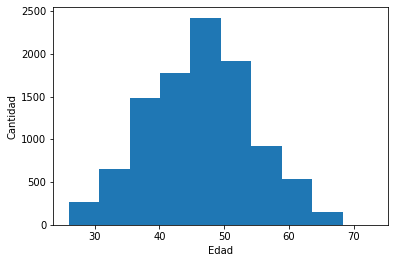

In [78]:
data = df_1.customer_age
(counts, bins, patches) = plt.hist(data)
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()